## Loan Default Predictor ##

This notebook incldues a loan default classifier using the [Lending Club Loan dataset](https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv/data) found in Kaggle.

The notebook shows in detail the preprocessing of the data and the training of 4 classifiers (logistic regression, decision tree, random forest, and XGB classifiers).

We found that the Random Forest classifier performed the best with an accuracy and f1-score of 98%.

In [1]:
# Import necessary libraries
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pickle

# Loading and cleaning the data

In [2]:
# Load the dataset
df = pd.read_csv('loan.csv')

C:\Users\alber\AppData\Local\Temp\ipykernel_35048\1919811814.py:2: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


In [3]:
# Check first rows
df.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   
5 NaN        NaN       5550         5550           5550.0   36 months   
6 NaN        NaN       2000         2000           2000.0   36 months   
7 NaN        NaN       6000         6000           6000.0   36 months   
8 NaN        NaN       5000         5000           5000.0   36 months   
9 NaN        NaN       6000         6000           6000.0   36 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.56        84.92     C        C1  ...                            NaN   
1     18.94       777.23     D        D2  ...                            NaN   
2     17.97       180.69     D        D1  ...                            NaN   
3     18.94       146.51     D        D2  ...                            NaN   
4     16.14       731.78     C        C4  ...                            NaN   
5     15.02       192.45     C        C3  ...                            NaN   
6     17.97        72.28     D        D1  ...                            NaN   
7     13.56       203.79     C        C1  ...                            NaN   
8     17.97       180.69     D        D1  ...                            NaN   
9     14.47       206.44     C        C2  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   
5                          NaN                Cash                     N   
6                          NaN                Cash                     N   
7                          NaN           DirectPay                     N   
8                          NaN                Cash                     N   
9                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   
5                       NaN               NaN             NaN   
6                       NaN               NaN             NaN   
7                       NaN               NaN             NaN   
8                       NaN               NaN             NaN   
9                       NaN               NaN             NaN   

  settlement_amount  settlement_percentage settlement_term  
0               NaN                    NaN             NaN  
1               NaN                    NaN             NaN  
2               NaN                    NaN             NaN  
3               NaN                    NaN             NaN  
4               NaN                    NaN             NaN  
5               NaN                    NaN             NaN  
6               NaN                    NaN             NaN  
7               NaN                    NaN             NaN  
8               NaN                    NaN             NaN  
9               NaN                    NaN             NaN  

[10 rows x 145 columns]

In [4]:
# Check shape
df.shape

(2260668, 145)

In [5]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [6]:
df.dtypes.value_counts()

float64    105
object      36
int64        4
Name: count, dtype: int64

In [ ]:
# Function that calculates the % of missing values per feature and saves it in a dataframe
def missing_values(df):
        mis_val_percent_df = pd.DataFrame(100 * df.isnull().sum() / len(df)).rename(
        columns = {0 : '% of Total Values Missing'})
        mis_val_percent_sorted = mis_val_percent_df.sort_values(
        '% of Total Values Missing', ascending=False).round(1)
        cols_with_na = (df.isna().sum() > 0).sum()
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(cols_with_na) +
              " columns that have missing values.")
        return mis_val_percent_sorted

# check missing values
miss_values = missing_values(df)
miss_values.head(50)

Dataframe has 145 columns.
There are 113 columns that have missing values.


% of Total Values Missing
id                                                              100.0
member_id                                                       100.0
url                                                             100.0
orig_projected_additional_accrued_interest                       99.6
hardship_amount                                                  99.5
hardship_dpd                                                     99.5
hardship_loan_status                                             99.5
deferral_term                                                    99.5
hardship_end_date                                                99.5
hardship_status                                                  99.5
hardship_start_date                                              99.5
hardship_reason                                                  99.5
hardship_type                                                    99.5
hardship_payoff_balance_amount                                   99.5
hardship_last_payment_amount                                     99.5
hardship_length                                                  99.5
payment_plan_start_date                                          99.5
debt_settlement_flag_date                                        98.5
settlement_term                                                  98.5
settlement_amount                                                98.5
settlement_date                                                  98.5
settlement_percentage                                            98.5
settlement_status                                                98.5
sec_app_mths_since_last_major_derog                              98.4
sec_app_revol_util                                               95.3
revol_bal_joint                                                  95.2
sec_app_earliest_cr_line                                         95.2
sec_app_mort_acc                                                 95.2
sec_app_open_act_il                                              95.2
sec_app_num_rev_accts                                            95.2
sec_app_inq_last_6mths                                           95.2
sec_app_chargeoff_within_12_mths                                 95.2
sec_app_open_acc                                                 95.2
sec_app_collections_12_mths_ex_med                               95.2
verification_status_joint                                        94.9
dti_joint                                                        94.7
annual_inc_joint                                                 94.7
desc                                                             94.4
mths_since_last_record                                           84.1
mths_since_recent_bc_dlq                                         77.0
mths_since_last_major_derog                                      74.3
mths_since_recent_revol_delinq                                   67.3
next_pymnt_d                                                     57.7
mths_since_last_delinq                                           51.2
il_util                                                          47.3
mths_since_rcnt_il                                               40.3
all_util                                                         38.3
total_cu_tl                                                      38.3
open_acc_6m                                                      38.3
inq_last_12m                                                     38.3

In [8]:
# Function to keep only columns with less than x % missing values
def filter_columns_with_less_than_x_percent_missing(df, x_pct):
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    cols_to_keep = mis_val_percent[mis_val_percent < x_pct].index.tolist()
    filtered_df = df[cols_to_keep]
    return filtered_df


#Keep only columns with less than 50 % missing values
df1 = filter_columns_with_less_than_x_percent_missing(df, x_pct=50)

print(df1.shape)
print(f'We eliminated a total of {df.shape[1]-df1.shape[1]} features')

(2260668, 101)
We eliminated a total of 44 features


In [9]:
# Verify
missing_values(df1).head(30)

Dataframe has 101 columns.
There are 69 columns that have missing values.


% of Total Values Missing
il_util                                     47.3
mths_since_rcnt_il                          40.3
all_util                                    38.3
open_acc_6m                                 38.3
total_cu_tl                                 38.3
inq_last_12m                                38.3
open_il_12m                                 38.3
open_act_il                                 38.3
open_il_24m                                 38.3
open_rv_24m                                 38.3
max_bal_bc                                  38.3
open_rv_12m                                 38.3
total_bal_il                                38.3
inq_fi                                      38.3
mths_since_recent_inq                       13.1
emp_title                                    7.4
num_tl_120dpd_2m                             6.8
emp_length                                   6.5
mo_sin_old_il_acct                           6.2
bc_util                                      3.4
percent_bc_gt_75                             3.3
bc_open_to_buy                               3.3
mths_since_recent_bc                         3.2
pct_tl_nvr_dlq                               3.1
avg_cur_bal                                  3.1
mo_sin_rcnt_rev_tl_op                        3.1
mo_sin_old_rev_tl_op                         3.1
num_rev_accts                                3.1
tot_coll_amt                                 3.1
tot_cur_bal                                  3.1

In [10]:
# Checking missing values in categorical data

# List categorical features
cat_col = df1.select_dtypes(include=['object']).columns

# Check missing values in categorical features
cat_mv = df1[cat_col].isnull().sum()

print("Missing values in categorical features:\n", cat_mv)

Missing values in categorical features:
 term                         0
grade                        0
sub_grade                    0
emp_title               166969
emp_length              146907
home_ownership               0
verification_status          0
issue_d                      0
loan_status                  0
pymnt_plan                   0
purpose                      0
title                    23326
zip_code                     1
addr_state                   0
earliest_cr_line            29
initial_list_status          0
last_pymnt_d              2426
last_credit_pull_d          73
application_type             0
hardship_flag                0
disbursement_method          0
debt_settlement_flag         0
dtype: int64


In [11]:
# Drop the columns with several missing values
var_drop= ['emp_title', 'emp_length', 'title', 'last_pymnt_d']

# Drop rows with missing values in any of the specified variables
df1 = df1.dropna(subset=var_drop)

# Verify
print("Missing values in categorical features:\n", df1[cat_col].isnull().sum())

Missing values in categorical features:
 term                     0
grade                    0
sub_grade                0
emp_title                0
emp_length               0
home_ownership           0
verification_status      0
issue_d                  0
loan_status              0
pymnt_plan               0
purpose                  0
title                    0
zip_code                 1
addr_state               0
earliest_cr_line        17
initial_list_status      0
last_pymnt_d             0
last_credit_pull_d      66
application_type         0
hardship_flag            0
disbursement_method      0
debt_settlement_flag     0
dtype: int64


In [12]:
# Checking numerical missing values

# List numeric features
num_col = df1.select_dtypes(exclude=['object']).columns

# Check missing values in numeric features
num_mv = df1[num_col].isnull().sum().to_string()

print("Missing values in numeric features:\n", num_mv)

Missing values in numeric features:
 loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
int_rate                           0
installment                        0
annual_inc                         0
dti                               93
delinq_2yrs                       17
inq_last_6mths                    18
open_acc                          17
pub_rec                           17
revol_bal                          0
revol_util                      1579
total_acc                         17
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
collections_12_mths_ex_med       121
policy_code                        0
a

In [13]:
#Imputing missing values with mean
df1[num_col] = df1[num_col].apply(lambda col: col.fillna(col.mean()))

In [14]:
# Check missing values in numerical features
num_mv = df1[num_col].isnull().sum().to_string()

print("Missing values in numeric features:\n", num_mv)

Missing values in numeric features:
 loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
open_acc_6m                   0
ope

In [15]:
df1.shape

(2070680, 101)

In [16]:
df2= df1.copy()

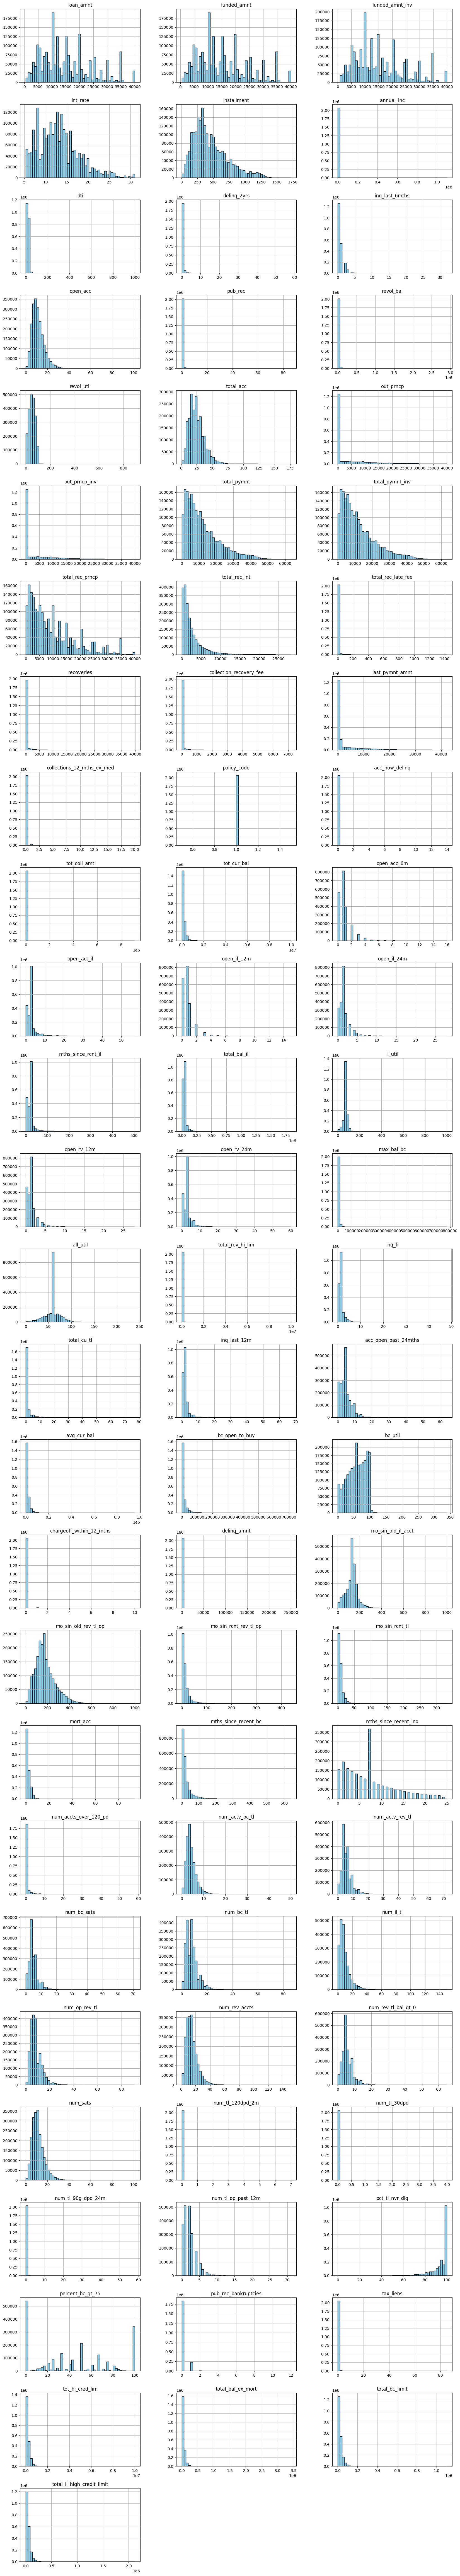

In [17]:
# Plotting histograms for numerical data
df2[num_col].hist(bins=50, figsize=(20, 150), 
                                                                            layout=(df2.shape[1]//3 + 1,3), color='skyblue', edgecolor='black')

plt.show()

In [18]:
df2.dtypes.value_counts()

float64    75
object     22
int64       4
Name: count, dtype: int64

In [21]:
# Print unique values for each numerical feature, save features with 10 or less unique values and turn them into categorical features
num_to_cat = []
for col in num_col:
    unique_values = df[col].round(1).nunique()
    print(f'Unique values in {col}: {unique_values}')
    if unique_values<=10:
        num_to_cat.append(col)

for col in num_to_cat:
    df2[col] = df2[col].astype('object')


Unique values in loan_amnt: 1572
Unique values in funded_amnt: 1572
Unique values in funded_amnt_inv: 9250
Unique values in int_rate: 229
Unique values in installment: 13279
Unique values in annual_inc: 88389
Unique values in dti: 2366
Unique values in delinq_2yrs: 37
Unique values in inq_last_6mths: 28
Unique values in open_acc: 91
Unique values in pub_rec: 43
Unique values in revol_bal: 102251
Unique values in revol_util: 1335
Unique values in total_acc: 152
Unique values in out_prncp: 185832
Unique values in out_prncp_inv: 189962
Unique values in total_pymnt: 378162
Unique values in total_pymnt_inv: 378914
Unique values in total_rec_prncp: 166277
Unique values in total_rec_int: 133362
Unique values in total_rec_late_fee: 2615
Unique values in recoveries: 47474
Unique values in collection_recovery_fee: 14442
Unique values in last_pymnt_amnt: 235699
Unique values in collections_12_mths_ex_med: 16
Unique values in policy_code: 1
Unique values in acc_now_delinq: 9
Unique values in tot_c

In [22]:
df2.dtypes.value_counts()

float64    72
object     26
int64       3
Name: count, dtype: int64

In [23]:
df3 = df2.copy()

## EDA ##

In [ ]:
# Check our target variable loan_status
df3['loan_status'].unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [25]:
# Calculate the value counts of each category in 'loan_status'
loan_status_value_counts = df3['loan_status'].value_counts()

# Calculate the percentage of each category in 'loan_status'
percentage_loan_status = (loan_status_value_counts / len(df3['loan_status'])) * 100

# Combine the value counts and percentages into a DataFrame
loan_status_summary = pd.DataFrame({'Count': loan_status_value_counts, 'Percentage': percentage_loan_status})

# Print the results
print("Values in 'loan_status' and their percentages:")
print(loan_status_summary)

Values in 'loan_status' and their percentages:
                                                     Count  Percentage
loan_status                                                           
Fully Paid                                          971158   46.900439
Current                                             832153   40.187426
Charged Off                                         233922   11.296869
Late (31-120 days)                                   19437    0.938677
In Grace Period                                       8191    0.395571
Late (16-30 days)                                     3214    0.155215
Does not meet the credit policy. Status:Fully Paid    1877    0.090647
Does not meet the credit policy. Status:Charged...     700    0.033805
Default                                                 28    0.001352


In [26]:
#Drop other values for the target variable and keep only "Fully Paid" and "Charged Off"
df3 = df3[df3['loan_status'].isin(['Fully Paid', 'Charged Off'])]

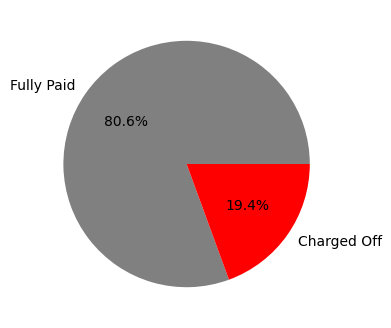

In [27]:
#Pie chart for target variable loan_status
loan_status_counts = df3['loan_status'].value_counts()

plt.figure(figsize=(8, 4))
plt.pie(loan_status_counts.values, labels=loan_status_counts.index, autopct='%1.1f%%', 
        colors=['grey', 'red'])
plt.show()

In [28]:
df3.shape

(1205080, 101)

In [29]:
#Separate features and target variable
X = df3.drop('loan_status', axis=1)
y = df3['loan_status']

#Undersample the data to get the same amount of data points for both targets
rus = RandomUnderSampler(random_state = 123)
X_resampled, y_resampled = rus.fit_resample(X, y)

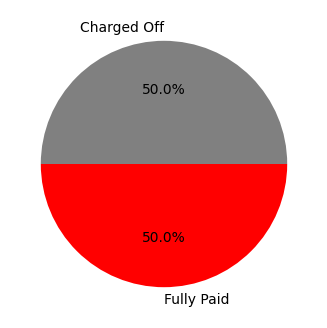

In [30]:
#Plot the pie chart
loan_status_resampled_counts = y_resampled.value_counts()

plt.figure(figsize=(8, 4))
plt.pie(loan_status_resampled_counts, labels=loan_status_resampled_counts.index, 
        autopct='%1.1f%%',colors=['grey', 'red'])
plt.show()

In [31]:
#Combine X_resampled and y_resampled back into a new DataFrame
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

#Verify
print(resampled_df['loan_status'].value_counts())

loan_status
Charged Off    233922
Fully Paid     233922
Name: count, dtype: int64


In [32]:
#Re-label target variable: 'fully paid' to 0 and 'charged off' to 1
resampled_df['loan_status'] = resampled_df['loan_status'].replace({'Fully Paid': 0, 'Charged Off': 1})

C:\Users\alber\AppData\Local\Temp\ipykernel_35048\797273918.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  resampled_df['loan_status'] = resampled_df['loan_status'].replace({'Fully Paid': 0, 'Charged Off': 1})


In [33]:
df4 = resampled_df.copy()

In [34]:
# Filter categorical variables
categorical_df = df4.select_dtypes('object')
cat_col = categorical_df.columns

# Print unique values for each feature, save features with 1 or more than 20 categories to drop them
feat_to_drop = []
for col in cat_col:
    unique_values = df4[col].round(1).nunique()
    print(f'Unique values in {col}: {unique_values}')
    if (unique_values>=20) or (unique_values==1):
        feat_to_drop.append(col)

Unique values in term: 2
Unique values in grade: 7
Unique values in sub_grade: 35
Unique values in emp_title: 169272
Unique values in emp_length: 11
Unique values in home_ownership: 6
Unique values in verification_status: 3
Unique values in issue_d: 138
Unique values in pymnt_plan: 1
Unique values in purpose: 14
Unique values in title: 23591
Unique values in zip_code: 913
Unique values in addr_state: 51
Unique values in earliest_cr_line: 680
Unique values in initial_list_status: 2
Unique values in last_pymnt_d: 133
Unique values in last_credit_pull_d: 129
Unique values in policy_code: 1
Unique values in application_type: 2
Unique values in acc_now_delinq: 7
Unique values in num_tl_120dpd_2m: 7
Unique values in num_tl_30dpd: 6
Unique values in hardship_flag: 2
Unique values in disbursement_method: 2
Unique values in debt_settlement_flag: 2


In [35]:
#Take a look to the features to drop
df4[feat_to_drop].head(10)

sub_grade                             emp_title   issue_d pymnt_plan  \
55148         E5                    CNC Robotic Welder  Nov-2018          n   
60604         C5                   Information Tech II  Nov-2018          n   
62536         C2                              Engineer  Nov-2018          n   
67928         B1                             warehouse  Nov-2018          n   
68761         A1                            Technician  Nov-2018          n   
84484         B3            Secondary Science Director  Oct-2018          n   
90907         C1                                   Mgr  Oct-2018          n   
99041         A5                                 Owner  Oct-2018          n   
107165        C3              Boat Services Technician  Oct-2018          n   
108863        B1  Administrator - Financial Management  Oct-2018          n   

                          title zip_code addr_state earliest_cr_line  \
55148        Debt consolidation    612xx         IL         Nov-2008   
60604        Debt consolidation    231xx         VA         Jun-2006   
62536          Home improvement    750xx         TX         Jun-2005   
67928        Debt consolidation    551xx         MN         Feb-2013   
68761        Debt consolidation    210xx         MD         Jul-1996   
84484          Home improvement    318xx         GA         Mar-2004   
90907   Credit card refinancing    048xx         ME         Feb-2005   
99041        Debt consolidation    200xx         DC         Oct-1988   
107165    Moving and relocation    025xx         MA         Aug-2012   
108863  Credit card refinancing    062xx         CT         Jul-1996   

       last_pymnt_d last_credit_pull_d policy_code  
55148      Dec-2018           Feb-2019           1  
60604      Dec-2018           Nov-2018           1  
62536      Dec-2018           Feb-2019           1  
67928      Dec-2018           Feb-2019           1  
68761      Dec-2018           Jan-2019           1  
84484      Dec-2018           Feb-2019           1  
90907      Nov-2018           Dec-2018           1  
99041      Nov-2018           Nov-2018           1  
107165     Nov-2018           Jan-2019           1  
108863     Dec-2018           Dec-2018           1

In [36]:
# Drop the features
df4.drop(columns= feat_to_drop, inplace=True)

In [37]:
df4.dtypes.value_counts()

float64    72
object     14
int64       4
Name: count, dtype: int64

In [38]:
df4.shape

(467844, 90)

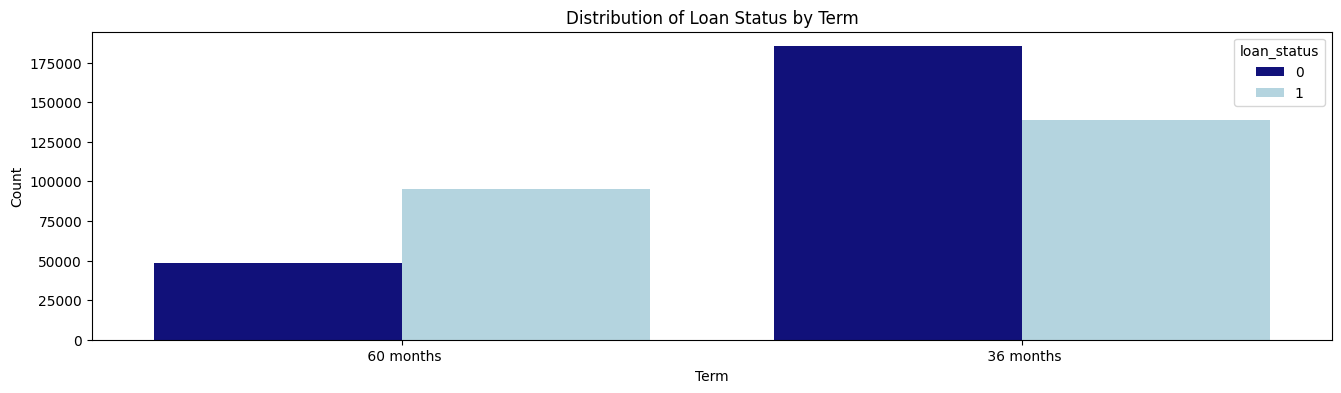

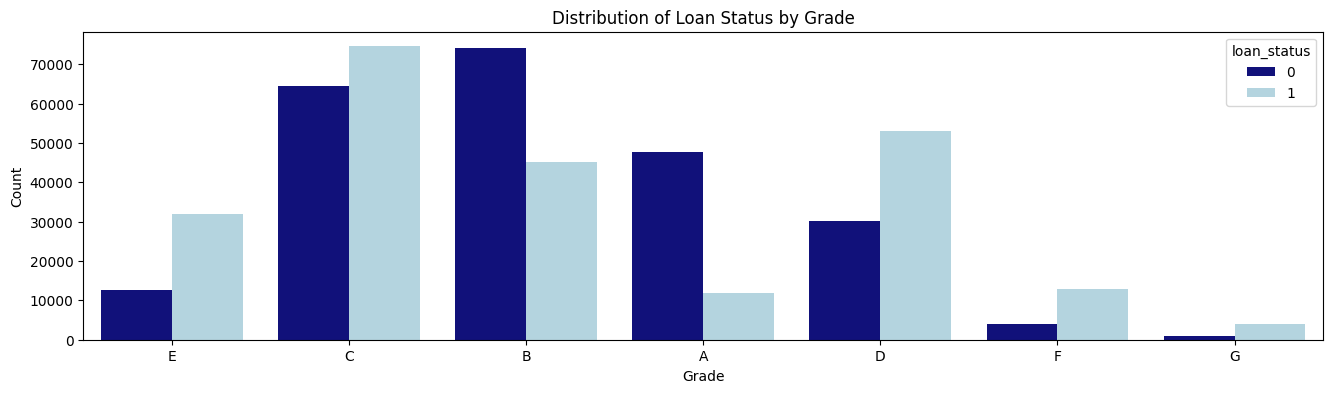

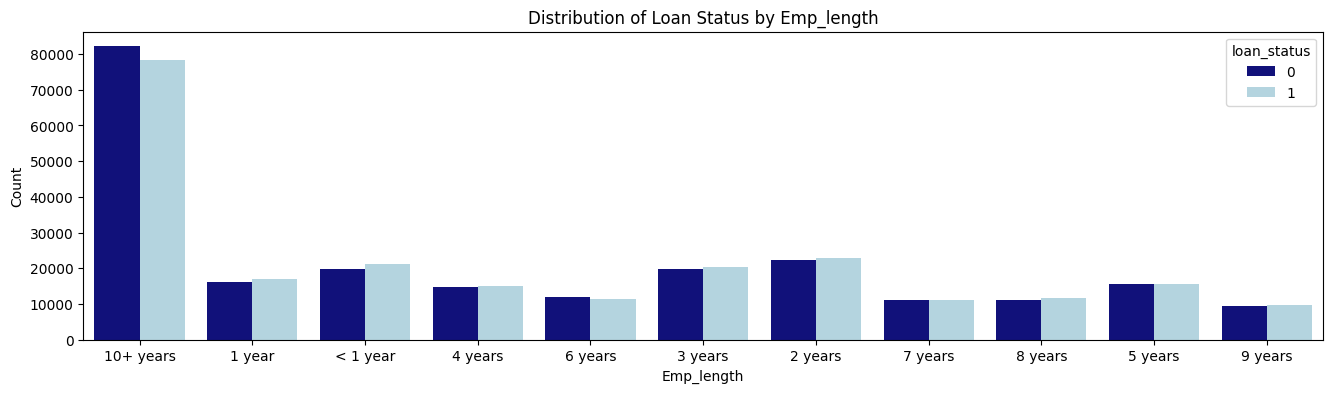

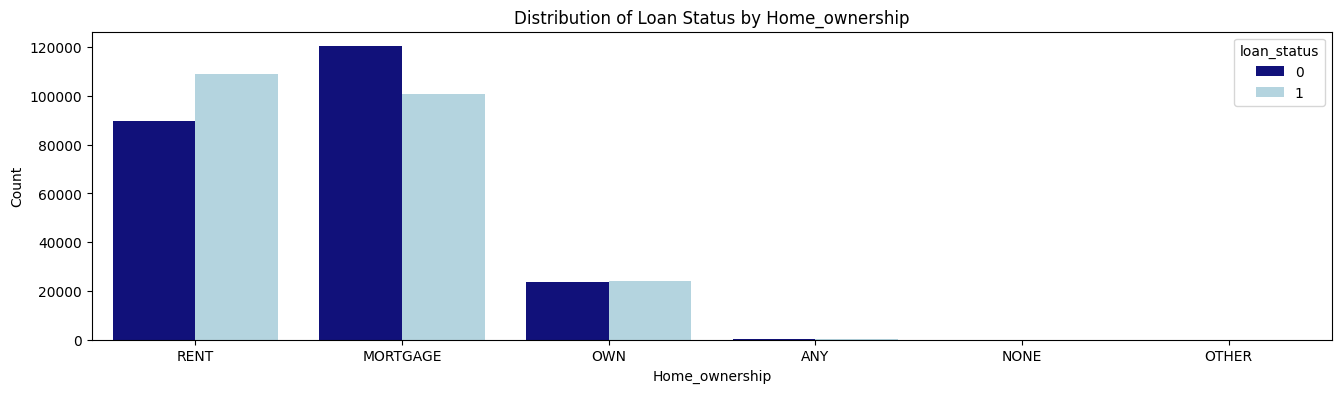

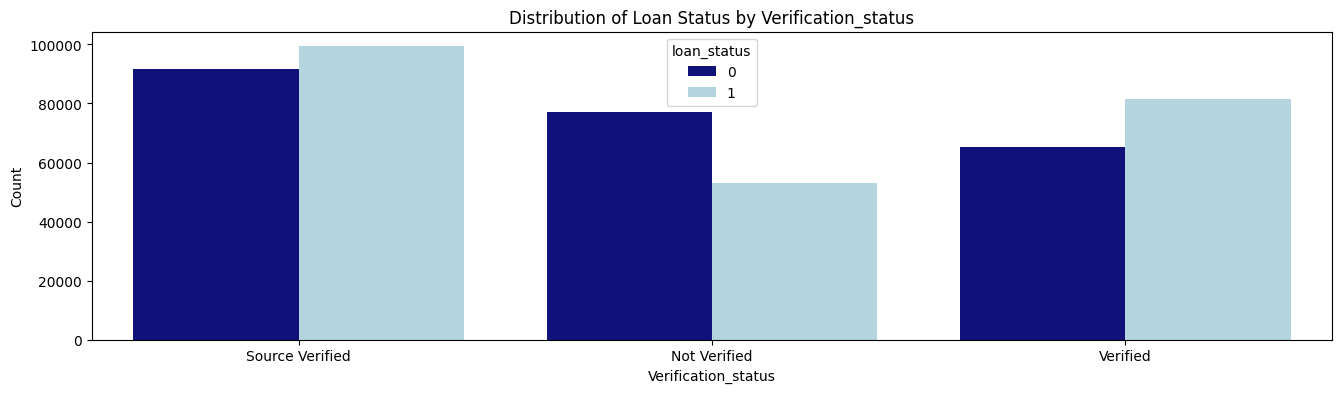

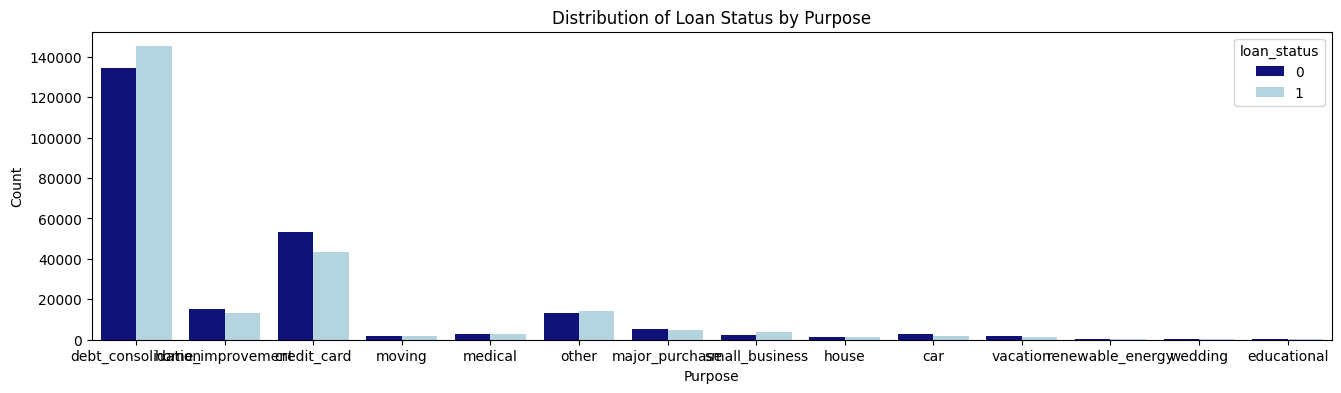

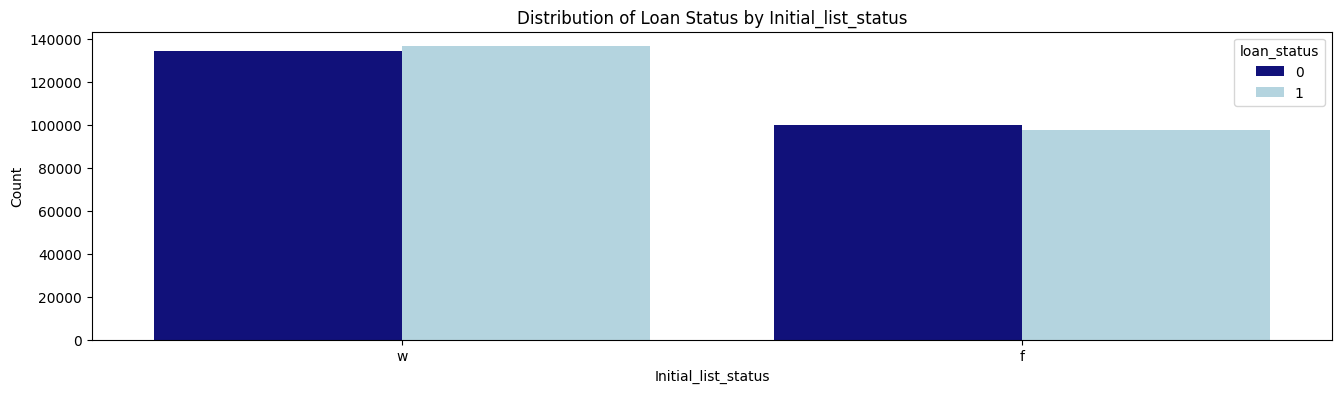

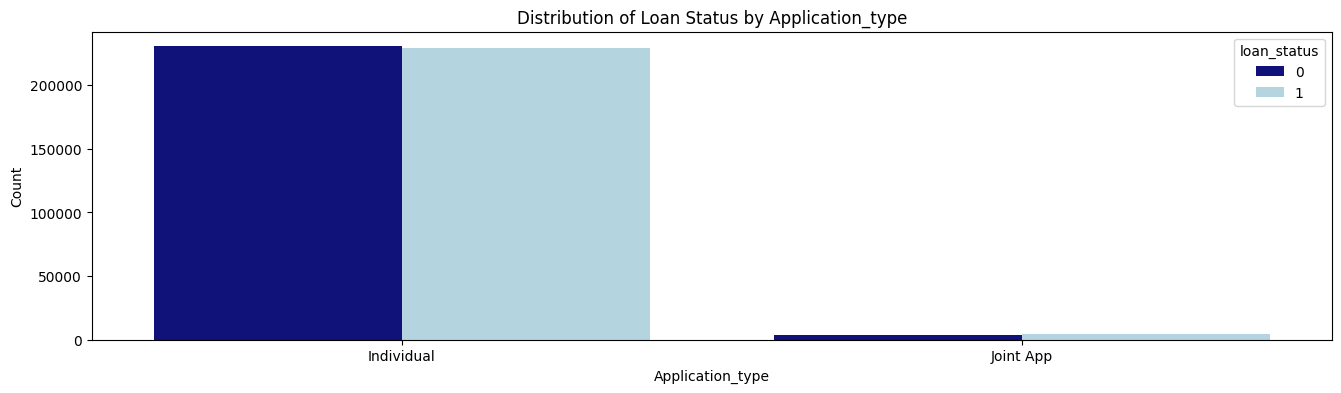

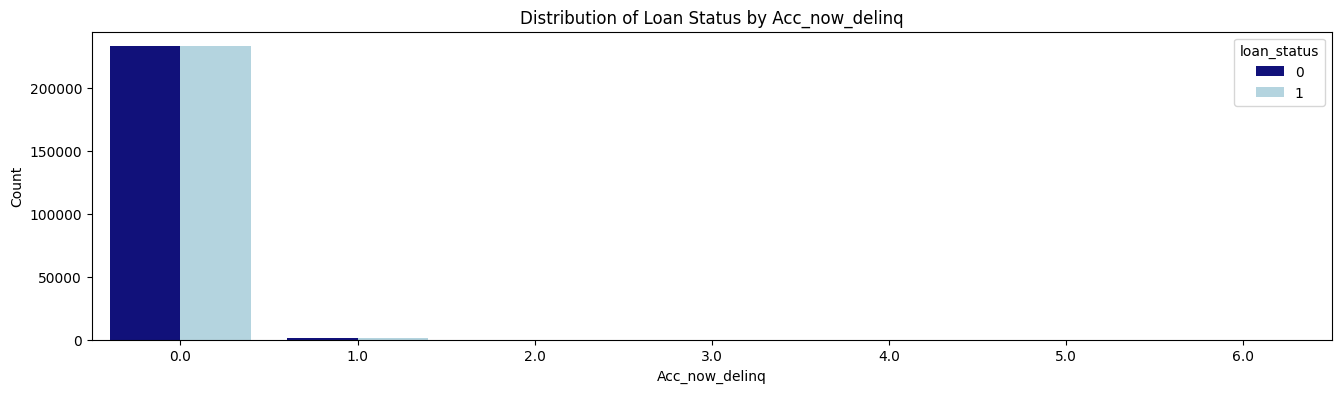

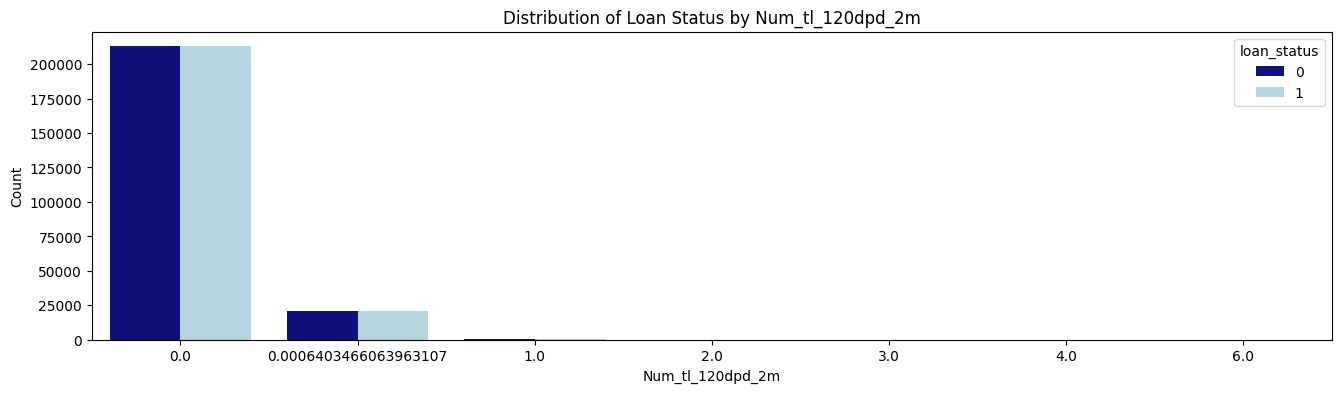

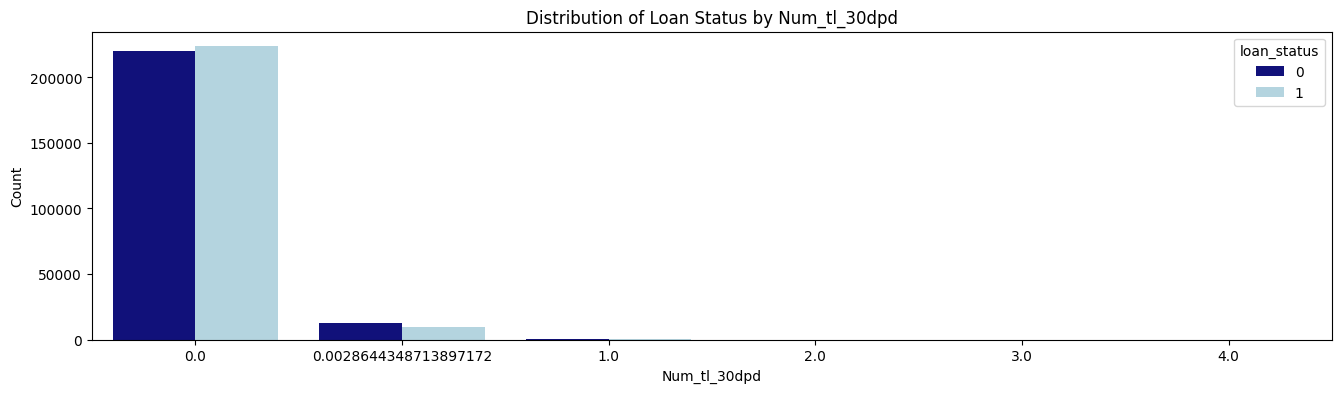

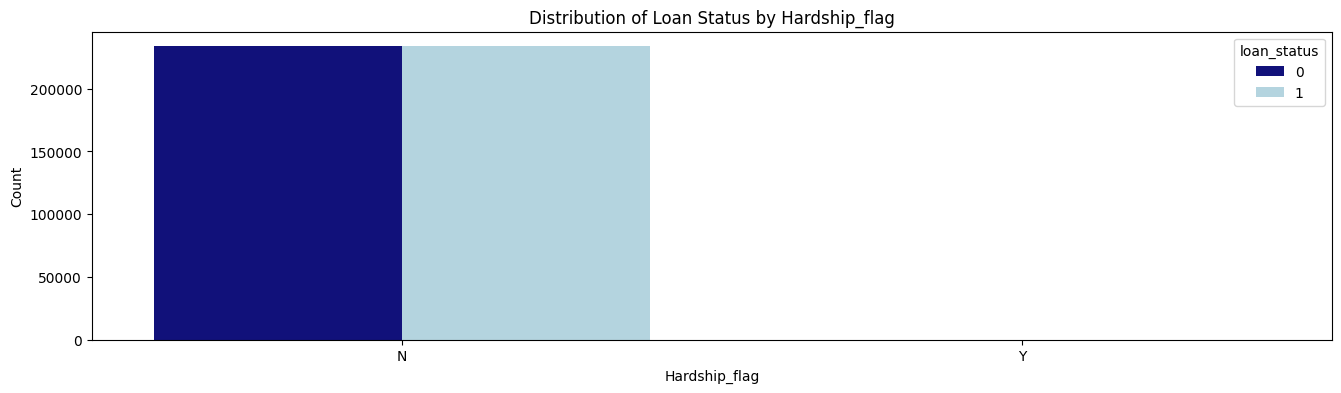

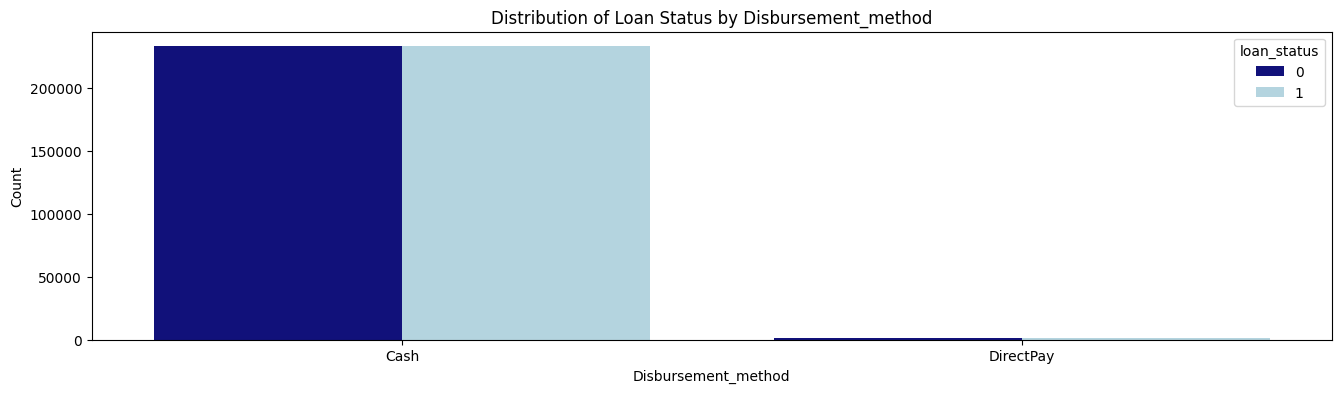

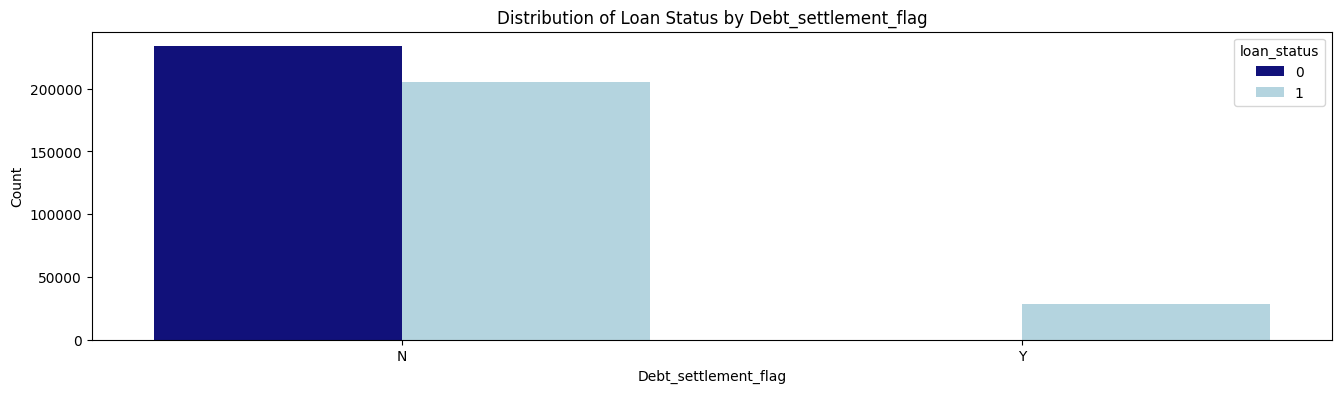

In [39]:
# Identify categorical columns
cat_col = df4.select_dtypes(include=['object']).columns

# Loop through each categorical column and create a bar plot
for col in cat_col:
    plt.figure(figsize=(16, 4))
    sns.countplot(x=col, hue='loan_status', data=df4, palette=['darkblue', 'lightblue'])
    plt.title(f'Distribution of Loan Status by {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.show()

In [40]:
#See what categorical variables look like
df4.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
emp_length              11
home_ownership           6
verification_status      3
purpose                 14
initial_list_status      2
application_type         2
acc_now_delinq           7
num_tl_120dpd_2m         7
num_tl_30dpd             6
hardship_flag            2
disbursement_method      2
debt_settlement_flag     2
dtype: int64

In [41]:
#One-hot encode categorical features

cat_df = df4.select_dtypes(include='object')

#One-hot encoding
cat_dummies = pd.get_dummies(cat_df)
#Drop original categorical columns
df4_encoded = df4.drop(cat_df.columns, axis=1)

df4 = pd.concat([df4_encoded, cat_dummies], axis=1)

In [42]:
df4.head(5)

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
55148      10000        10000          10000.0     27.27       306.97   
60604       4800         4800           4800.0     16.91       170.92   
62536      35000        35000          35000.0     14.47      1204.23   
67928      16000        16000          15975.0     10.08       340.59   
68761      25000        25000          25000.0      6.46       765.77   

       annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  ...  \
55148     70000.0  11.37          0.0             1.0       4.0  ...   
60604    111000.0  13.35          0.0             0.0      12.0  ...   
62536     95000.0  11.61          1.0             2.0       5.0  ...   
67928     45000.0  25.52          0.0             1.0      10.0  ...   
68761     83200.0  28.54          1.0             0.0      16.0  ...   

       num_tl_30dpd_1.0  num_tl_30dpd_2.0  num_tl_30dpd_3.0  num_tl_30dpd_4.0  \
55148             False             False             False             False   
60604             False             False             False             False   
62536             False             False             False             False   
67928             False             False             False             False   
68761             False             False             False             False   

       hardship_flag_N  hardship_flag_Y  disbursement_method_Cash  \
55148             True            False                      True   
60604             True            False                      True   
62536             True            False                      True   
67928             True            False                      True   
68761             True            False                     False   

       disbursement_method_DirectPay  debt_settlement_flag_N  \
55148                          False                    True   
60604                          False                    True   
62536                          False                    True   
67928                          False                    True   
68761                           True                    True   

       debt_settlement_flag_Y  
55148                   False  
60604                   False  
62536                   False  
67928                   False  
68761                   False  

[5 rows x 149 columns]

In [43]:
df5 = df4.copy()

In [44]:
df5.shape

(467844, 149)

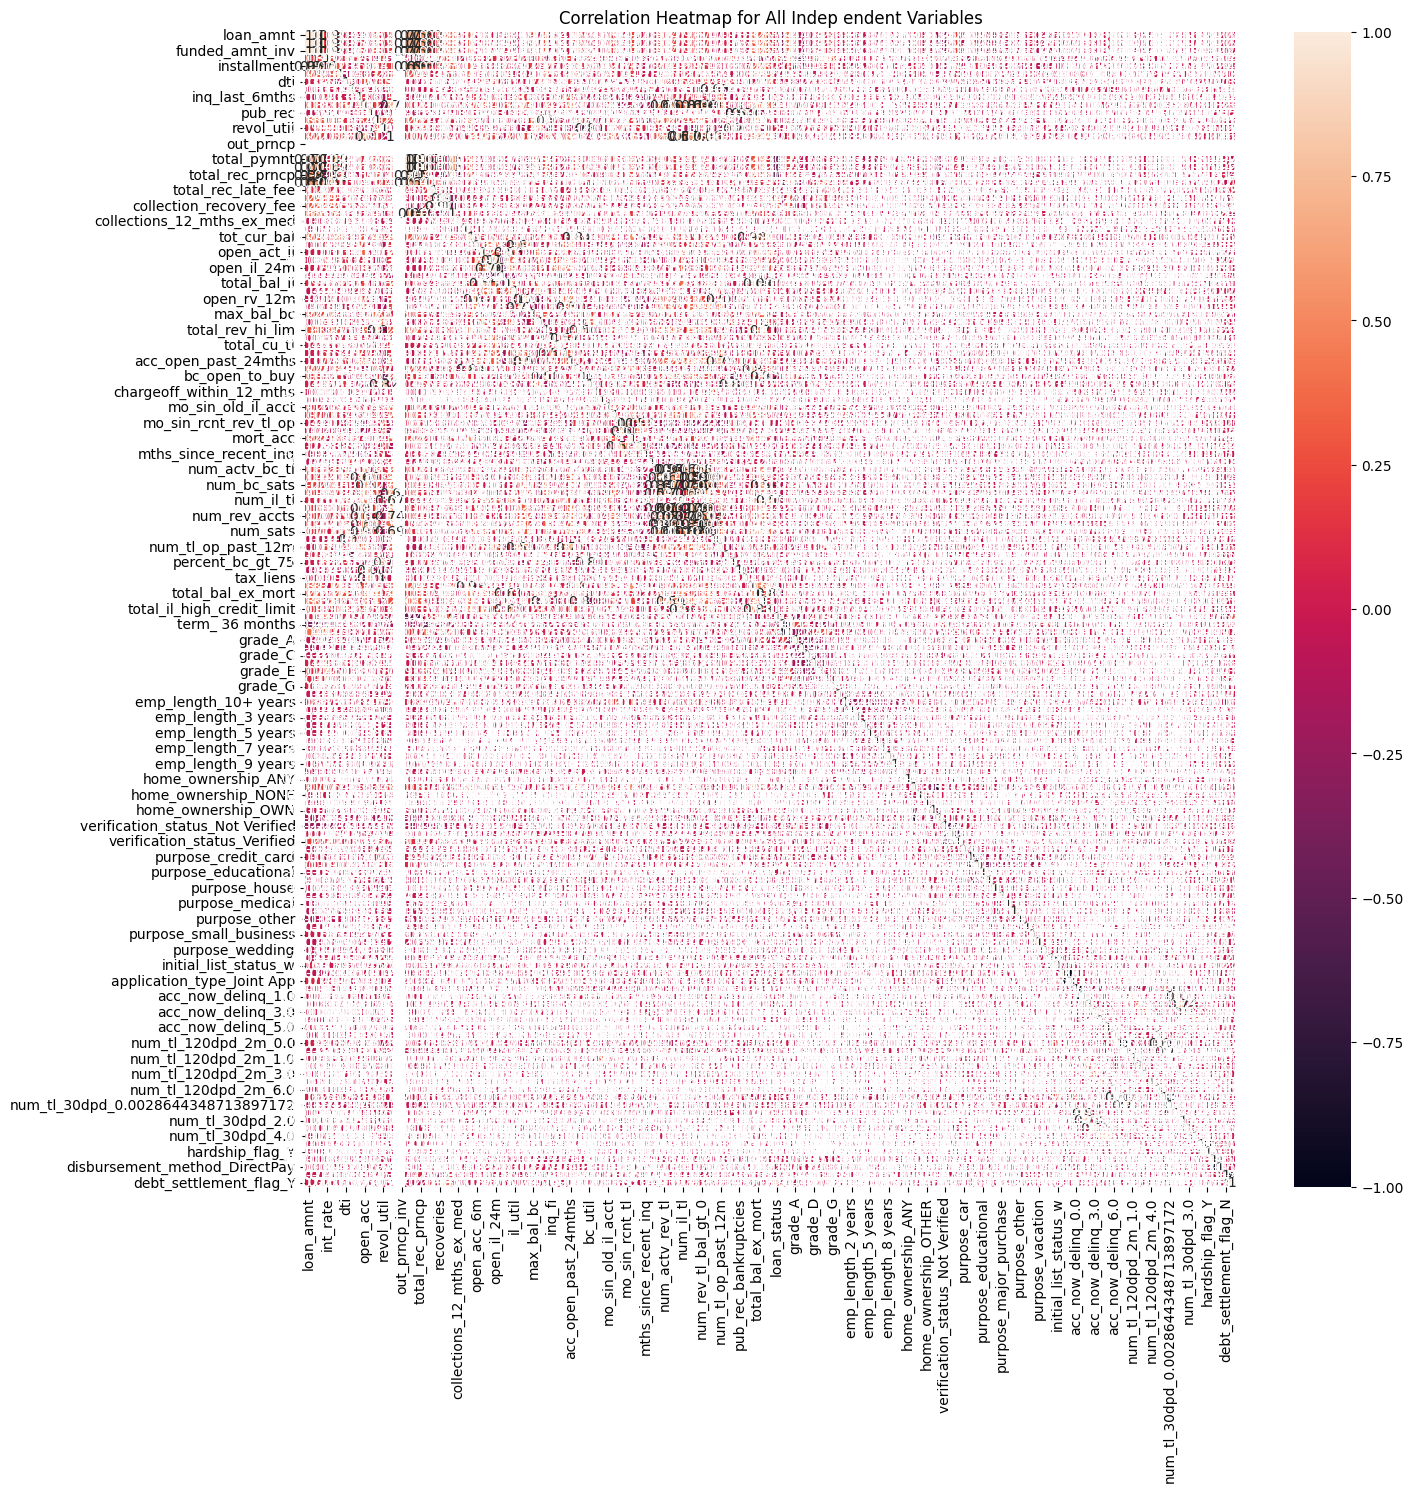

In [45]:
#Correlation matrix

corr=df5.corr()
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

# Set the title
plt.title('Correlation Heatmap for All Indep endent Variables')

# Show the plot
plt.show()

In [46]:
#Set up threshold
target_variable = 'loan_status'
threshold = 0.2 

#Find features with significant correlation with the target variable
significant_correlations = corr[target_variable].drop(target_variable).where(lambda x: abs(x) > threshold).dropna()

#Print
for feature, corr_value in significant_correlations.items():
    print(f"{feature} and {target_variable} have a correlation of {corr_value:.2f}")

int_rate and loan_status have a correlation of 0.31
total_pymnt and loan_status have a correlation of -0.42
total_pymnt_inv and loan_status have a correlation of -0.42
total_rec_prncp and loan_status have a correlation of -0.58
recoveries and loan_status have a correlation of 0.42
collection_recovery_fee and loan_status have a correlation of 0.40
last_pymnt_amnt and loan_status have a correlation of -0.51
term_ 36 months and loan_status have a correlation of -0.21
term_ 60 months and loan_status have a correlation of 0.21
grade_A and loan_status have a correlation of -0.23
debt_settlement_flag_N and loan_status have a correlation of -0.26
debt_settlement_flag_Y and loan_status have a correlation of 0.26


In [47]:
# Select only features with significant correlation to target feature

sel_features = [feature for feature, corr_value in significant_correlations.items()]
sel_features.append('loan_status')

df6 = df5[sel_features]

In [48]:
df6.columns

Index(['int_rate', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'term_ 36 months', 'term_ 60 months', 'grade_A',
       'debt_settlement_flag_N', 'debt_settlement_flag_Y', 'loan_status'],
      dtype='object')

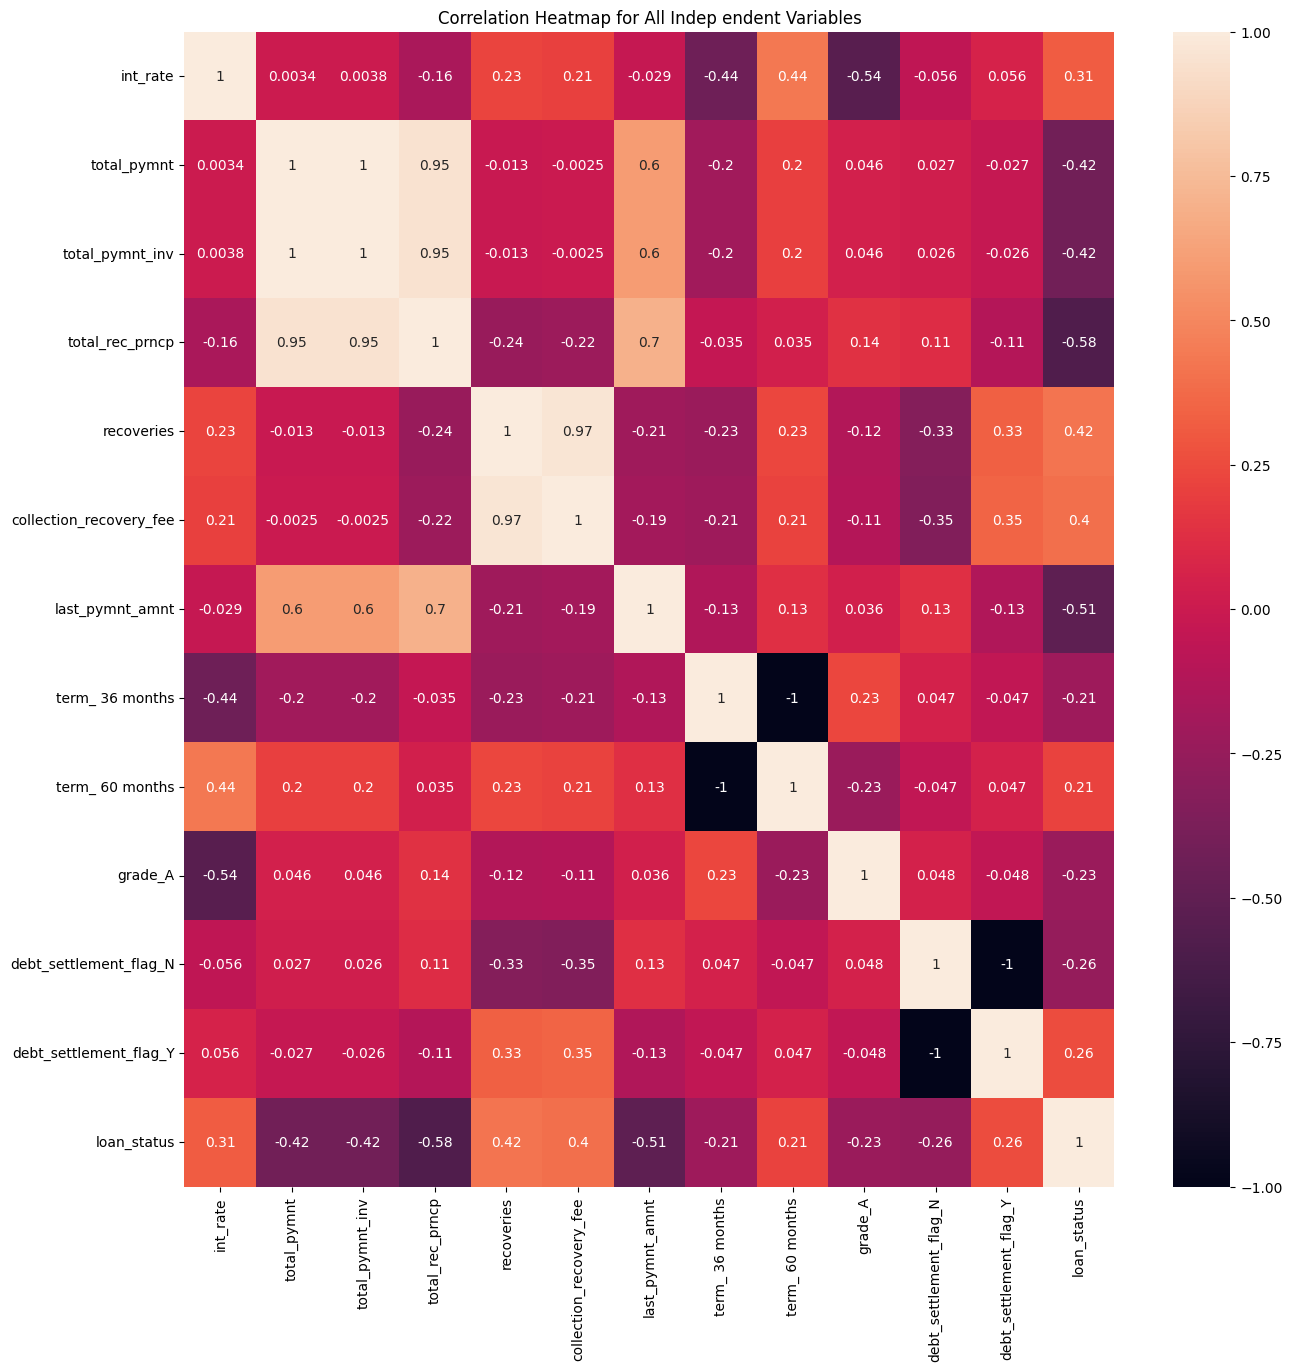

In [ ]:
# Correlation matrix of selected features

corr=df6.corr()
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

# Set the title
plt.title('Correlation Heatmap for All Indep endent Variables')

# Show the plot
plt.show()

In [51]:
# we drop highly correlated features

df7 = df6.drop(['total_pymnt_inv', 'total_rec_prncp',
       'term_ 36 months', 'debt_settlement_flag_Y', 'collection_recovery_fee'], axis=1)
df7.columns

Index(['int_rate', 'total_pymnt', 'recoveries', 'last_pymnt_amnt',
       'term_ 60 months', 'grade_A', 'debt_settlement_flag_N', 'loan_status'],
      dtype='object')

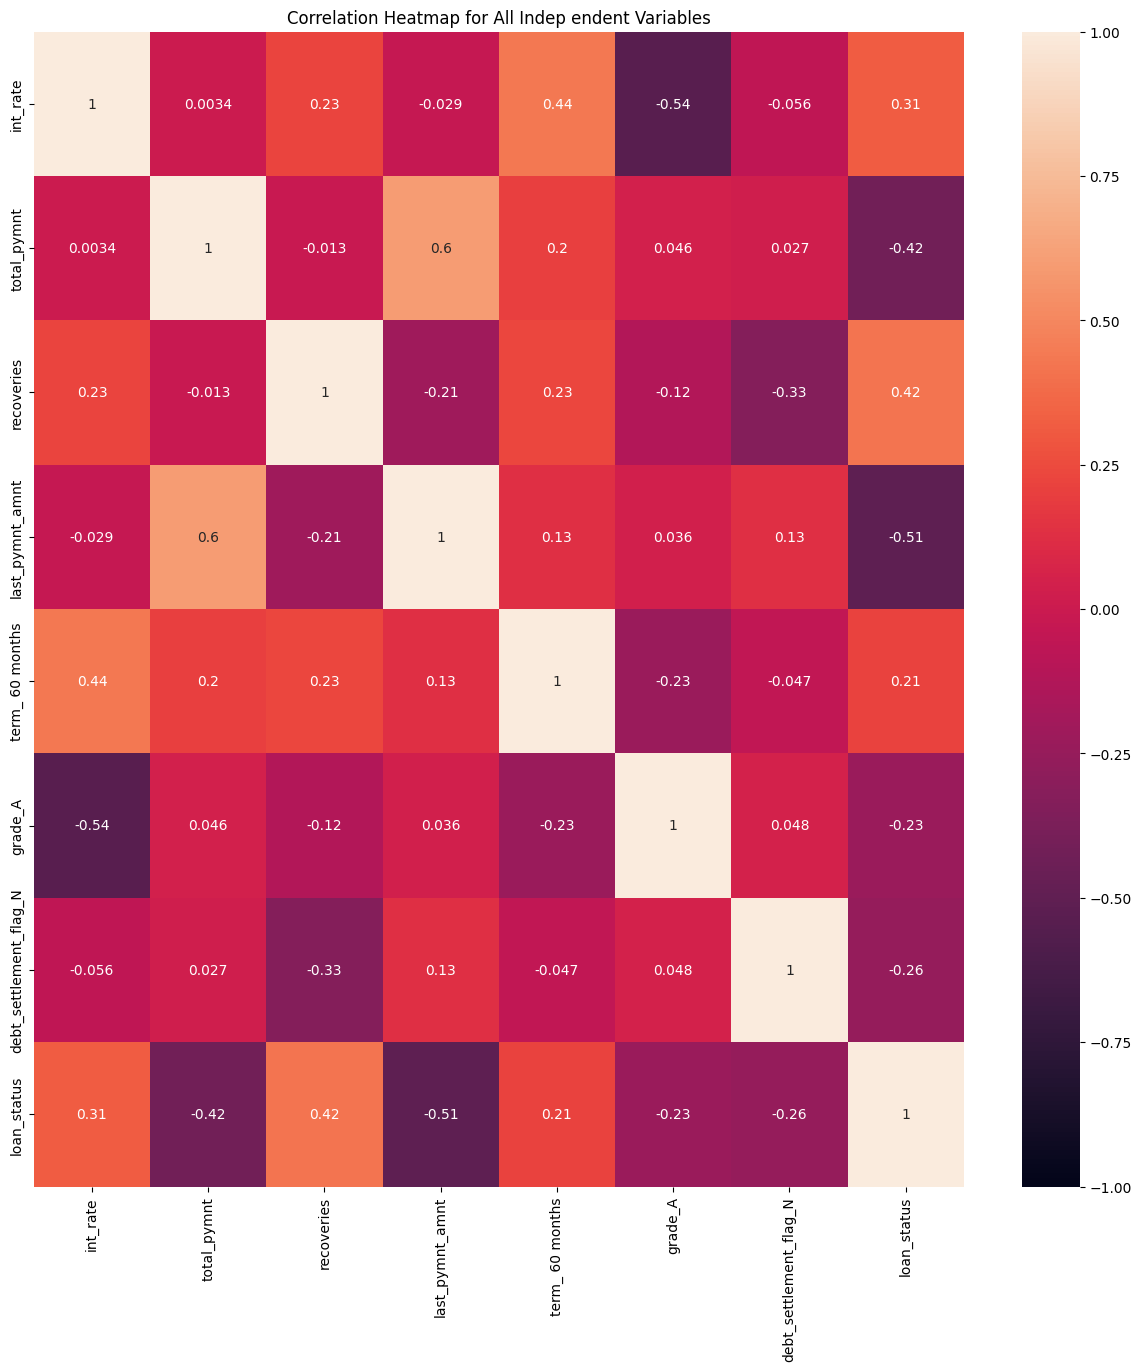

In [52]:
#Correlation matrix of selected features

corr=df7.corr()
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

# Set the title
plt.title('Correlation Heatmap for All Indep endent Variables')

# Show the plot
plt.show()

# Split data into train, test data

In [53]:
X = df7.drop('loan_status', axis=1)
y = df7['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Load and train our models

In [55]:
#scaling data (good for logistic regression)

scaler = StandardScaler()

# Fit the scaler only on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
#Training the models

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)  
y_pred_log = log_reg.predict(X_test_scaled)

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)  
y_pred_dt = dt_clf.predict(X_test)

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train) 
y_pred_rf = rf_clf.predict(X_test)

# XGBoost Classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)


In [57]:
# Print evaluation metrics for each model
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))

print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     58401
           1       0.93      0.91      0.92     58560

    accuracy                           0.92    116961
   macro avg       0.92      0.92      0.92    116961
weighted avg       0.92      0.92      0.92    116961

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     58401
           1       0.97      0.96      0.97     58560

    accuracy                           0.96    116961
   macro avg       0.96      0.96      0.96    116961
weighted avg       0.96      0.96      0.96    116961

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     58401
           1       0.97      0.98      0.98     58560

    accuracy                           0.98    116961
   macro avg       0.98      0.98      0.98    116961
w

# The model that performs the best is the Random Forest classifier with a f1-score of 0.98

In [58]:
#Get feature importances in decision tree
importances = dt_clf.feature_importances_

#Create a DataFrame to view the features and their importance scores
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

#Sort the DataFrame to see the most important features at the top
features_df.sort_values(by='Importance', ascending=False, inplace=True)

print(features_df)

                  Feature  Importance
2              recoveries    0.521138
3         last_pymnt_amnt    0.250465
1             total_pymnt    0.136414
4         term_ 60 months    0.050275
0                int_rate    0.030527
6  debt_settlement_flag_N    0.010655
5                 grade_A    0.000527


In [59]:
#Get feature importances in random forest
importances = rf_clf.feature_importances_

#Create a DataFrame to view the features and their importance scores
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

#Sort the DataFrame to see the most important features at the top
features_df.sort_values(by='Importance', ascending=False, inplace=True)

print(features_df)

                  Feature  Importance
3         last_pymnt_amnt    0.382349
2              recoveries    0.337047
1             total_pymnt    0.162745
0                int_rate    0.050082
4         term_ 60 months    0.037708
6  debt_settlement_flag_N    0.020531
5                 grade_A    0.009538


In [60]:
#Get feature importances in xgboost classifier
importances = xgb_clf.feature_importances_

#Create a DataFrame to view the features and their importance scores
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

#Sort the DataFrame to see the most important features at the top
features_df.sort_values(by='Importance', ascending=False, inplace=True)

print(features_df)

                  Feature  Importance
2              recoveries    0.939433
4         term_ 60 months    0.022305
3         last_pymnt_amnt    0.013103
6  debt_settlement_flag_N    0.011885
5                 grade_A    0.006551
1             total_pymnt    0.005186
0                int_rate    0.001538


last_pymnt_amnt seems to be the most important in RFC, recoveries is the most important feature in the DTC and XGBC

Finally, we look at the confusion matrices

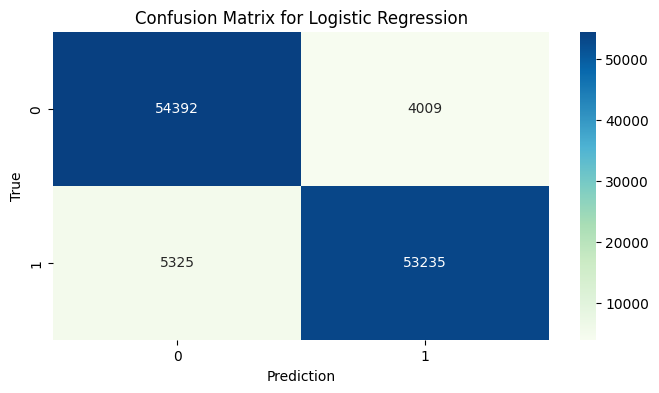

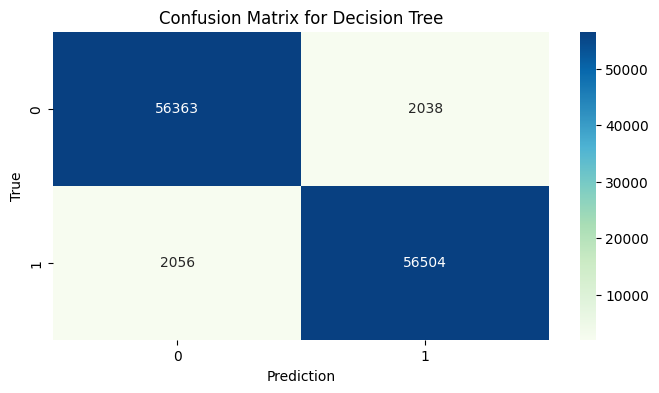

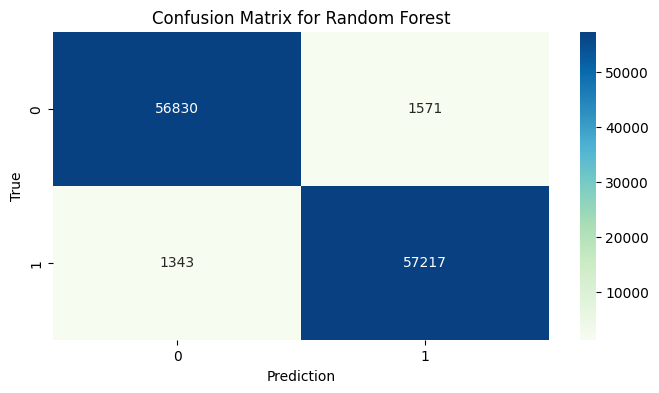

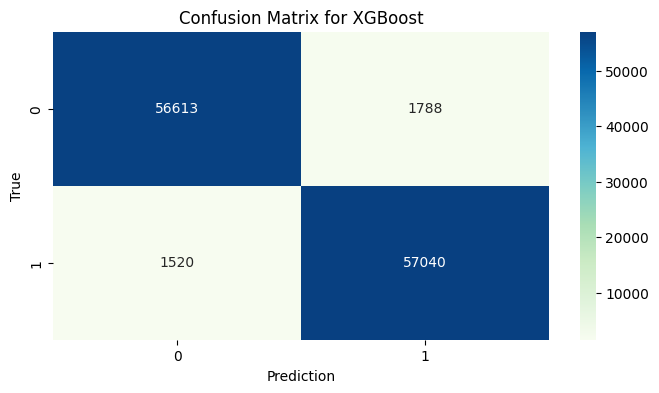

In [62]:
#Confusion matrix for our models
y_preds = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

for model_name, y_pred in y_preds.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', cbar=True)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.show()

# Save and Load the model using Pickle

In [65]:
# Save the model for later use, in this case I just chose to save the RF classifier as it performed the best
# Save the model
with open('model_loandef_rf.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)

In [67]:
# Load the model
# We can load the model in the future and use on new data or we can consider deploying it
with open('model_loandef_rf.pkl', 'rb') as file:
    loaded_model_rf = pickle.load(file)